# TP2 LDD Futbol Analytics

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split


## 1. Preprocesamiento

In [3]:
# 1. Cargar en un DataFrame los datos del archivo FBRef2020-21.csv.
data_futbol = pd.read_csv('FBRef2020-21.csv')
data_futbol.head()

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,29.0,1990.0,22,20,1777,...,96.8,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,32.0,1987.0,33,33,2889,...,130.5,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22
2,Pape Abou Cisse,sn SEN,DF,Saint-Étienne,fr Ligue 1,24.0,1995.0,14,14,1260,...,117.9,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00
3,David Abraham,ar ARG,DF,Eint Frankfurt,de Bundesliga,34.0,1986.0,14,14,1222,...,92.7,3.24,0.66,0.00,0.22,0.00,34.8,33.4,96.0,0.59
4,Francesco Acerbi,it ITA,DF,Lazio,it Serie A,32.0,1988.0,32,32,2813,...,166.3,3.71,1.02,0.03,0.45,0.26,50.9,49.5,97.3,0.70


In [6]:
# 2. Eliminar a los jugadores que jugaron menos de 500 minutos en la temporada (columna Min).
data_futbol.drop(data_futbol[(data_futbol['Min'] < 500)].index, inplace=True)
data_futbol


,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,29.0,1990.0,22,20,1777,...,96.8,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,32.0,1987.0,33,33,2889,...,130.5,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22
2,Pape Abou Cisse,sn SEN,DF,Saint-Étienne,fr Ligue 1,24.0,1995.0,14,14,1260,...,117.9,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00
3,David Abraham,ar ARG,DF,Eint Frankfurt,de Bundesliga,34.0,1986.0,14,14,1222,...,92.7,3.24,0.66,0.00,0.22,0.00,34.8,33.4,96.0,0.59
4,Francesco Acerbi,it ITA,DF,Lazio,it Serie A,32.0,1988.0,32,32,2813,...,166.3,3.71,1.02,0.03,0.45,0.26,50.9,49.5,97.3,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,Reinhold Yabo,de GER,"MF,FW",Arminia,de Bundesliga,28.0,1992.0,13,8,647,...,76.3,3.47,1.39,0.42,0.97,0.97,31.1,21.0,67.4,2.78
2819,Amin Younes,de GER,"MF,FW",Eint Frankfurt,de Bundesliga,26.0,1993.0,26,16,1391,...,138.4,8.71,2.00,1.03,2.19,2.58,58.1,44.3,76.2,8.26
2820,Mattia Zaccagni,it ITA,"MF,FW",Hellas Verona,it Serie A,25.0,1995.0,36,33,2609,...,141.8,7.45,2.52,1.10,2.31,2.86,49.2,35.5,72.1,8.21
2821,Arber Zeneli,xk KVX,"MF,FW",Reims,fr Ligue 1,25.0,1995.0,28,14,1289,...,102.0,5.24,1.40,1.12,2.94,2.45,40.3,28.0,69.3,6.15


In [5]:
# 3. Eliminar los datos faltantes. Por ejemplo, eliminar columnas con m´as de 100 datos faltantes y luego 
# las filas con datos faltantes, o convertir los datos faltantes a alg´un valor apropiado.
data_futbol.dropna(axis=1, thresh=len(data_futbol) - 100, inplace=True)
data_futbol.dropna(inplace=True)

In [8]:
#4. Al finalizar la limpieza de datos, resetear los ´ındices.
data_futbol.reset_index(drop=True, inplace=True)
data_futbol

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,29.0,1990.0,22,20,1777,...,96.8,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,32.0,1987.0,33,33,2889,...,130.5,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22
2,Pape Abou Cisse,sn SEN,DF,Saint-Étienne,fr Ligue 1,24.0,1995.0,14,14,1260,...,117.9,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00
3,David Abraham,ar ARG,DF,Eint Frankfurt,de Bundesliga,34.0,1986.0,14,14,1222,...,92.7,3.24,0.66,0.00,0.22,0.00,34.8,33.4,96.0,0.59
4,Francesco Acerbi,it ITA,DF,Lazio,it Serie A,32.0,1988.0,32,32,2813,...,166.3,3.71,1.02,0.03,0.45,0.26,50.9,49.5,97.3,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897,Reinhold Yabo,de GER,"MF,FW",Arminia,de Bundesliga,28.0,1992.0,13,8,647,...,76.3,3.47,1.39,0.42,0.97,0.97,31.1,21.0,67.4,2.78
1898,Amin Younes,de GER,"MF,FW",Eint Frankfurt,de Bundesliga,26.0,1993.0,26,16,1391,...,138.4,8.71,2.00,1.03,2.19,2.58,58.1,44.3,76.2,8.26
1899,Mattia Zaccagni,it ITA,"MF,FW",Hellas Verona,it Serie A,25.0,1995.0,36,33,2609,...,141.8,7.45,2.52,1.10,2.31,2.86,49.2,35.5,72.1,8.21
1900,Arber Zeneli,xk KVX,"MF,FW",Reims,fr Ligue 1,25.0,1995.0,28,14,1289,...,102.0,5.24,1.40,1.12,2.94,2.45,40.3,28.0,69.3,6.15


In [9]:
# 5. Definir el DataFrame data_num que solo contenga las variables n´umericas, a partir de la columna Ast/90, inclusive. 
# Para clustering y clasificaci´on no vamos a utilizar las variables categ´oricas ni edad ni minutos jugados.
print(data_futbol.columns)
data_num = data_futbol.select_dtypes(include='number').loc[:, 'Ast/90':]
data_num.head()


Index(['Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts', 'Min',
       ...
       'PrgDistCarry/90', 'ProgCarry/90', 'CarryIntoThird/90',
       'CarryIntoBox/90', 'Miscontrol/90', 'Dispossessed/90', 'PassTarget/90',
       'PassesReceived/90', 'PassRec%', 'ProgPassReceived/90'],
      dtype='object', length=122)


,Ast/90,npG/90,npG+A/90,xA/90,npxG/90,npxG+xA/90,Shots/90,SoTs/90,FKSht/90,np:G-xG,...,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90
0,0.05,0.00,0.05,0.04,0.06,0.10,0.91,0.30,0.15,-0.06,...,96.8,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34
1,0.00,0.09,0.09,0.01,0.05,0.06,0.47,0.16,0.00,0.04,...,130.5,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22
2,0.00,0.00,0.00,0.00,0.08,0.09,0.93,0.21,0.00,-0.09,...,117.9,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00
3,0.00,0.07,0.07,0.03,0.05,0.08,0.66,0.15,0.00,0.02,...,92.7,3.24,0.66,0.00,0.22,0.00,34.8,33.4,96.0,0.59
4,0.03,0.00,0.03,0.03,0.03,0.06,0.26,0.00,0.00,-0.03,...,166.3,3.71,1.02,0.03,0.45,0.26,50.9,49.5,97.3,0.70


## 2. Clustering

6. Nuestro primer objetivo es realizar alg´un agrupamiento de jugadores con caracter´ısticas similares.

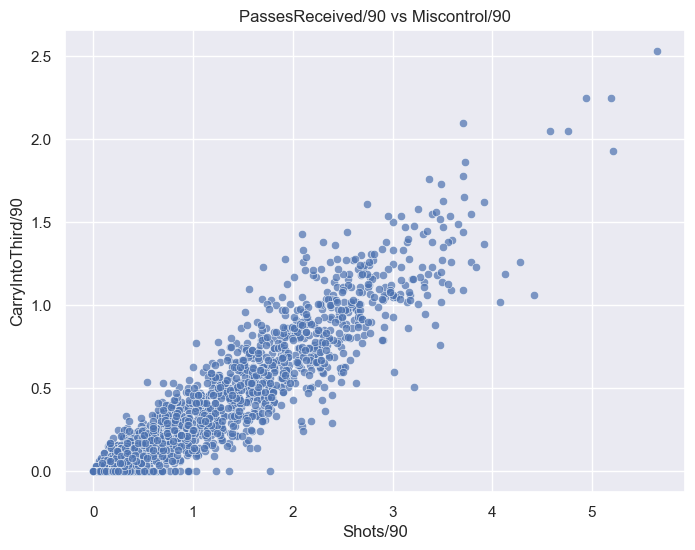

In [10]:
# (a) Seleccionar dos variables cualesquiera de los datos y realizar un gr´afico de dispersi´on de una variable en funci´on 
# de la otra para el total de las observaciones. ¿Pueden encontrar facilmente grupos distintos?

sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_num, x='Shots/90', y='SoTs/90', alpha=0.7)
plt.title('PassesReceived/90 vs Miscontrol/90')
plt.xlabel('Shots/90')
plt.ylabel('CarryIntoThird/90')
plt.show()

[[-2.92738971  2.24933453]
 [-6.81844764 -1.43034289]
 [-6.46838507 -3.80563181]
 ...
 [ 6.78672708  1.50385155]
 [ 6.84095096 -0.84326605]
 [ 2.44719685  2.05122189]]


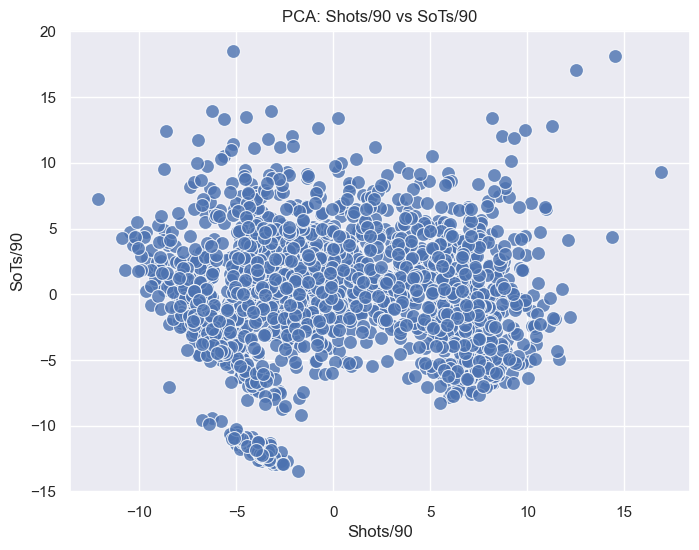

In [44]:
#(b) Escalar los datos y realizar un an´alisis de componentes principales, qued´andose solo con las dos primeras componentes. 
# Realizar un gr´afico como el del punto anterior. ¿Cu´antos clusters puede distinguir en el gr´afico? 
# ¿A qu´e caracter´ısticas de los jugadores pueden corresponder los clusters? 
# ¿C´omo pueden verificar su conjetura? (realizar una visualizaci´on o alg´un c´alculo)

variables_numericas = ['Shots/90', 'SoTs/90']# vuelvo a agarrar las dos variables de antes

scaler = StandardScaler()
df_scaled = scaler.fit_transform(data_num) # escalo los datos

pca = PCA(n_components=2)
componentes_principales = pca.fit_transform(df_scaled) # le aplico PCA
print(componentes_principales)

df_pca = pd.DataFrame(data=componentes_principales, columns=['Shots/90', 'SoTs/90']) # me genero un nuevo DataFrame con las componentes principales
#print(df_pca)

plt.figure(figsize=(8, 6)) # grafico el resultado del PCA
sns.scatterplot(x='Shots/90', y='SoTs/90', data=df_pca, s=100, alpha=0.8)
plt.title('PCA: Shots/90 vs SoTs/90')
plt.xlabel('Shots/90')
plt.ylabel('SoTs/90')
plt.grid(True)
plt.show()

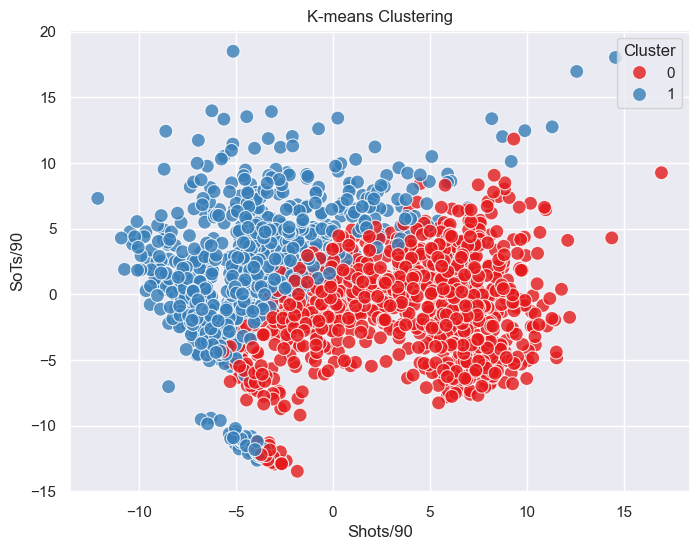

In [49]:
# (c) Para la cantidad de clusters observados en el ´ıtem anterior, realizar un agrupamiento por k-medias, 
# y colorear los puntos seg´un las etiquetas obtenidas. ¿Coinciden las etiquetas con lo esperado?


variables_numericas = ['Shots/90', 'SoTs/90']# vuelvo a agarrar las dos variables de antes

scaler = StandardScaler()
df_scaled = scaler.fit_transform(data_num) # escalo los datos

pca = PCA(n_components=2)
componentes_principales = pca.fit_transform(df_scaled) # le aplico PCA

df_pca = pd.DataFrame(data=componentes_principales, columns=['Shots/90', 'SoTs/90']) # me genero un nuevo DataFrame con las componentes principales

num_clusters = 2  # determino el numero de clusters

kmeans = KMeans(n_clusters=num_clusters, random_state=42) #aplico k-means
df_pca['Cluster'] = kmeans.fit_predict(data_num)

plt.figure(figsize=(8, 6)) #grafico el resultado
sns.scatterplot(x='Shots/90', y='SoTs/90', hue='Cluster', data=df_pca, s=100, palette='Set1', alpha=0.8, legend='full')
plt.title('K-means Clustering')
plt.xlabel('Shots/90')
plt.ylabel('SoTs/90')
plt.grid(True)
plt.show()

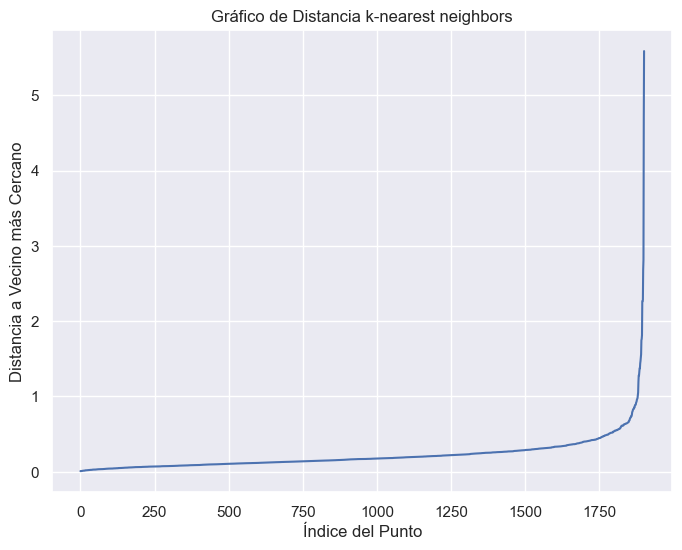

In [50]:
# (d) Repetir el agrupamiento utilizando DBSCAN. ¿C´omo eligir´ıan en este caso un valor de ε apropiado? 

#variables_numericas = ['Ast/90', 'PassRec%']# vuelvo a agarrar las dos variables de antes

scaler = StandardScaler()
df_scaled = scaler.fit_transform(data_num) # escalo los datos

pca = PCA(n_components=2)
componentes_principales = pca.fit_transform(df_scaled) # le aplico PCA

df_pca = pd.DataFrame(data=componentes_principales, columns=['Shots/90', 'SoTs/90']) # me genero un nuevo DataFrame con las componentes principales

# calculo el gráfico de distancia k-nearest neighbors
nn = NearestNeighbors(n_neighbors=2)
nn.fit(df_pca)


# ordeno de menor a mayor las distancias
distances, _ = nn.kneighbors(df_pca)
distances = distances[:,1]
distances = np.sort(distances, axis=0)

# grafico el gráfico de distancia k-nearest neighbors
plt.figure(figsize=(8, 6))
plt.plot(distances)
plt.title('Gráfico de Distancia k-nearest neighbors')
plt.xlabel('Índice del Punto')
plt.ylabel('Distancia a Vecino más Cercano')
plt.grid(True)
plt.show()



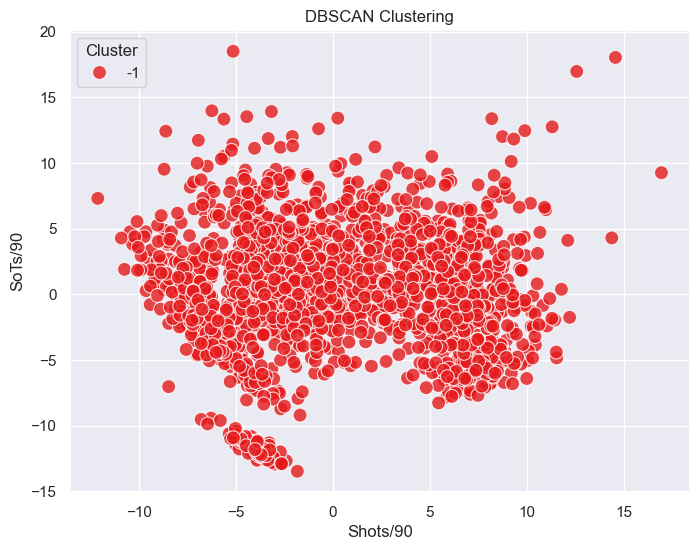

In [56]:
# me baso en el gráfico de distancia para seleccionar un valor de epsilon
# elijo el eps donde la curva hace un codo, asi tenemos un valor pequeño que incluye a la mayoria de los datos.
epsilon = 0.75  # Ajustar según el gráfico de distancia

# aplico DBSCAN
dbscan = DBSCAN(eps=epsilon, min_samples=2)  # ajusto min_samples según tus datos
df_pca['Cluster'] = dbscan.fit_predict(df_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Shots/90', y='SoTs/90', hue='Cluster', data=df_pca, s=100, palette='Set1', alpha=0.8, legend='full')
plt.title('DBSCAN Clustering')
plt.xlabel('Shots/90')
plt.ylabel('SoTs/90')
plt.grid(True)
plt.show()

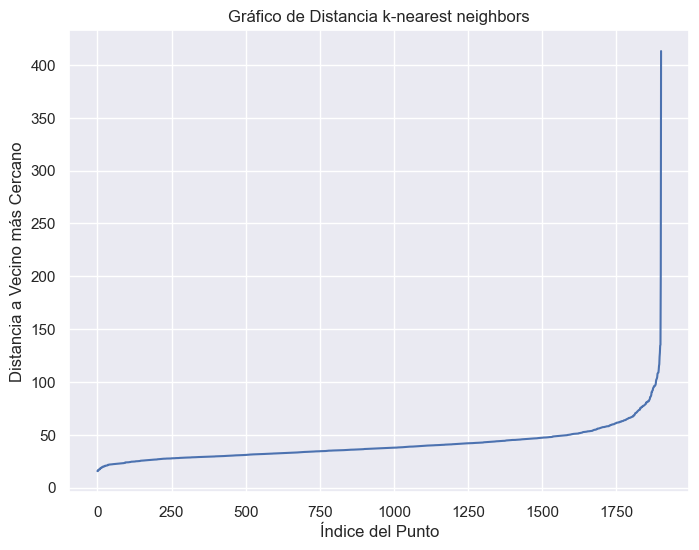

In [60]:
#(e)Utilizar DBSCAN para realizar agrupamiento utilizando como datos todas las variables originales en vez de solo las dos 
# componentes principales, modificando los valores de epsilon y minPts convenientemente. 
# ¿Con cu´al de las dos opciones obtienen mejores resultados?

# calculo el gráfico de distancia k-nearest neighbors
nn = NearestNeighbors(n_neighbors=2)
nn.fit(data_num)

# ordeno de menor a mayor las distancias
distances, _ = nn.kneighbors(data_num)
distances = distances[:,1]
distances = np.sort(distances, axis=0)

# grafico el gráfico de distancia k-nearest neighbors
plt.figure(figsize=(8, 6))
plt.plot(distances)
plt.title('Gráfico de Distancia k-nearest neighbors')
plt.xlabel('Índice del Punto')
plt.ylabel('Distancia a Vecino más Cercano')
plt.grid(True)
plt.show()

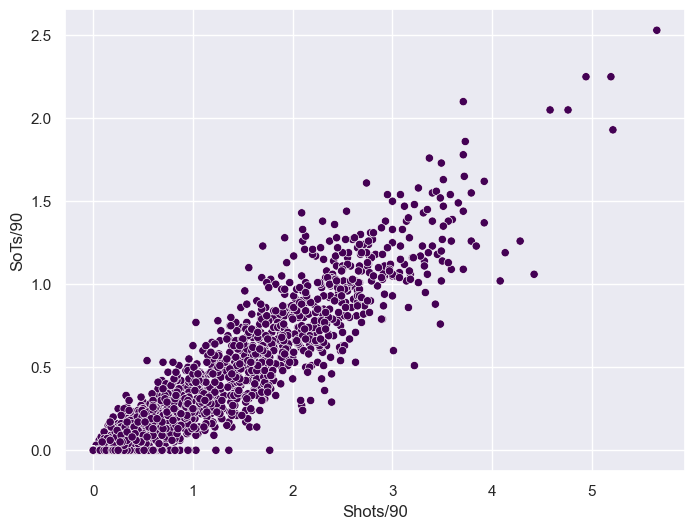

In [64]:
# Configurar y ajustar DBSCAN
dbscan = DBSCAN(eps=75, min_samples=5)  # Ajusta eps y min_samples según tu necesidad
clusters = dbscan.fit_predict(data_num[['Shots/90', 'SoTs/90']])

# Añadir los resultados de DBSCAN al plot
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_num['Shots/90'], y=data_num['SoTs/90'], c=clusters, cmap='viridis')
plt.show()

## 3. Clasificación

7. Ahora queremos poder predecir la posici´on en la que juega cada jugador seg´un sus datos
estad´ısticos utilizando KNN.

In [73]:
#(a) Definir la variable Pos_filt que es la columna Pos, pero donde los jugadores deben tener una sola posici´on 

# Crear Pos_filt quedándose solo con la primera posición listada
data_futbol['Pos_filt'] = data_futbol['Pos'].apply(lambda x: x.split(',')[0] if pd.notnull(x) else x)

# Mostrar las primeras filas para verificar
#print(data_futbol[['Pos', 'Pos_filt']].head())
data_futbol

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90,Pos_filt
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,29.0,1990.0,22,20,1777,...,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34,DF
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,32.0,1987.0,33,33,2889,...,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22,DF
2,Pape Abou Cisse,sn SEN,DF,Saint-Étienne,fr Ligue 1,24.0,1995.0,14,14,1260,...,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00,DF
3,David Abraham,ar ARG,DF,Eint Frankfurt,de Bundesliga,34.0,1986.0,14,14,1222,...,3.24,0.66,0.00,0.22,0.00,34.8,33.4,96.0,0.59,DF
4,Francesco Acerbi,it ITA,DF,Lazio,it Serie A,32.0,1988.0,32,32,2813,...,3.71,1.02,0.03,0.45,0.26,50.9,49.5,97.3,0.70,DF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897,Reinhold Yabo,de GER,"MF,FW",Arminia,de Bundesliga,28.0,1992.0,13,8,647,...,3.47,1.39,0.42,0.97,0.97,31.1,21.0,67.4,2.78,MF
1898,Amin Younes,de GER,"MF,FW",Eint Frankfurt,de Bundesliga,26.0,1993.0,26,16,1391,...,8.71,2.00,1.03,2.19,2.58,58.1,44.3,76.2,8.26,MF
1899,Mattia Zaccagni,it ITA,"MF,FW",Hellas Verona,it Serie A,25.0,1995.0,36,33,2609,...,7.45,2.52,1.10,2.31,2.86,49.2,35.5,72.1,8.21,MF
1900,Arber Zeneli,xk KVX,"MF,FW",Reims,fr Ligue 1,25.0,1995.0,28,14,1289,...,5.24,1.40,1.12,2.94,2.45,40.3,28.0,69.3,6.15,MF


In [74]:
# (b) Dividir el DataFrame data_num y la Series Pos_filt utilizando un 80% para entrenamiento y un 20% para testeo
# Seleccionar variables numéricas a partir de 'Ast/90'

#data_num = data_num.loc['Shots/90', 'SoTs/90']

# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_num)

# Definir X (características) e y (etiquetas)
X = data_scaled
y = data_futbol['Pos_filt']

# Separar en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Mostrar la forma de los conjuntos
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1331, 107) (571, 107) (1331,) (571,)


In [77]:
# (c) Aplicar un esquema de validaci´on en el conjunto de entrenamiento para seleccionar el valor ´optimo de K.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Definir y entrenar el modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Puede ajustar el valor de k
knn.fit(X_train, y_train)

# Realizar predicciones
y_pred = knn.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
#print(data_futbol['Pos_filt'].unique())

Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

          DF       0.96      0.96      0.96       229
          FW       0.84      0.87      0.85       125
          GK       1.00      1.00      1.00        28
          MF       0.87      0.85      0.86       189

    accuracy                           0.90       571
   macro avg       0.92      0.92      0.92       571
weighted avg       0.90      0.90      0.90       571

Confusion Matrix:
[[219   2   0   8]
 [  0 109   0  16]
 [  0   0  28   0]
 [ 10  19   0 160]]
['DF' 'FW' 'GK' 'MF']


In [ ]:
# (d) Para el valor de K obtenido, ¿cu´al es el porcentaje de aciertos en el conjunto de testeo?


In [ ]:
# (e) Repetir el procedimiento utilizando la primeras dos componentes principales en vez de todas las variables. 
# Indicar si se obtienen mejores resultados.

In [ ]:
# 8. Repetir el mismo m´etodo de clasificaci´on con el dataset de jugadoras de la liga inglesa femenina superleague2023.csv. 
# Para esto, quedarse con la columna Pos y las columnas a partir de MP,inclusive. 
# ¿Qu´e porcentaje de aciertos obtienen en este caso? ¿Puede modificarse el par´ametro para obtener un porcentaje mayor?